In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
import Cost
import random
import copy

In [18]:
dotMap = []
for i in range(4):
    center = []
    center.append(np.random.randint(100))
    center.append(np.random.randint(100))
    dotMap.append(center)
    for i in range(50):
        dot = []
        dot.append(center[0] + np.random.normal() * 8)
        dot.append(center[1] + np.random.normal() * 8)
        dotMap.append(dot)
dotMap = np.array(dotMap)

In [19]:
data_X = dotMap[:, 0]
data_Y = dotMap[:, 1]

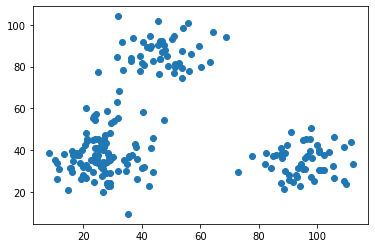

In [28]:
fig = plt.figure()
img = fig.add_subplot(111)
img.scatter(data_X, data_Y)
plt.show()

In [29]:
k = 4
center = np.zeros([k, 2])
for i in range(k):
    center[i]=(random.choice(dotMap))
group = []
for i in range(k):
    group.append([])

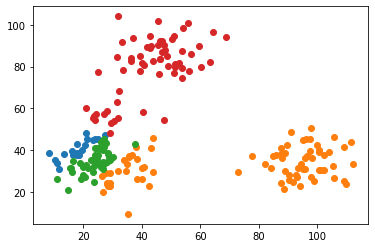

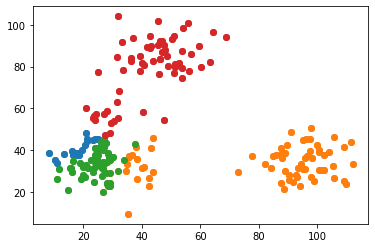

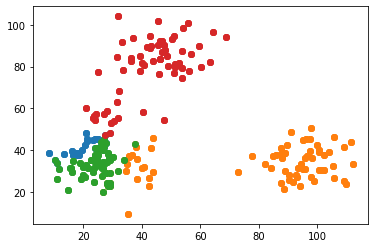

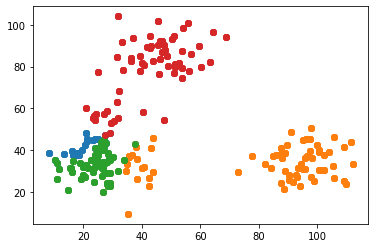

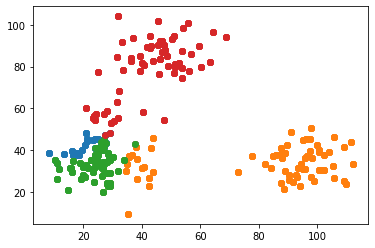

In [31]:
while True:
    beforeCenter = copy.deepcopy(center)
    for index in range(data_X.shape[0]):
        minDistance = 99999999999
        minIndex = -1
        for i in range(4):
            currentDistance = Cost.Euclidean(center[i], dotMap[index])
            if currentDistance < minDistance:
                minDistance = currentDistance
                minIndex = i
        group[minIndex].append(index)
    group = np.array(group)
    for i in range(k):
        groupCenter = dotMap[group[i][0]]
        for element in dotMap[group[i]]:
            groupCenter[0] = (element[0] + groupCenter[0]) / 2
            groupCenter[1] = (element[1] + groupCenter[1]) / 2
        center[i] = groupCenter
    fig = plt.figure()
    img = fig.add_subplot(111)
    cm = plt.cm.get_cmap('RdYlBu')
    for i in range(k):
        img.scatter(data_X[group[i]], data_Y[group[i]], cmap=cm)
    plt.show()
    if (beforeCenter == center).all():
        break